## Import Libraries

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored
import matplotlib.patches as patches

## Load Data

In [129]:
data = pd.read_csv('train.csv')
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,9.7,0.690,0.32,2.5,0.088,22.0,91.0,0.99790,3.29,0.62,10.1,5
1,6.6,0.580,0.02,2.4,0.069,19.0,40.0,0.99387,3.38,0.66,12.6,6
2,9.2,0.755,0.18,2.2,0.148,10.0,103.0,0.99690,2.87,1.36,10.2,6
3,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0,5
4,10.6,0.360,0.57,2.3,0.087,6.0,20.0,0.99676,3.14,0.72,11.1,7


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1000 non-null   float64
 1   volatile.acidity      1000 non-null   float64
 2   citric.acid           1000 non-null   float64
 3   residual.sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free.sulfur.dioxide   1000 non-null   float64
 6   total.sulfur.dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  quality               1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [131]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed.acidity,1000.0,8.301300,1.713092,4.70000,7.100000,7.90000,9.200000,15.9000
volatile.acidity,1000.0,0.523645,0.172574,0.12000,0.395000,0.51000,0.630000,1.5800
citric.acid,1000.0,0.268310,0.194616,0.00000,0.090000,0.25000,0.420000,1.0000
residual.sugar,1000.0,2.552300,1.429940,0.90000,1.900000,2.20000,2.600000,15.5000
chlorides,1000.0,0.087091,0.048161,0.01200,0.070000,0.07900,0.090000,0.6110
free.sulfur.dioxide,1000.0,15.862500,10.255048,1.00000,8.000000,14.00000,21.000000,72.0000
total.sulfur.dioxide,1000.0,46.255500,32.748579,6.00000,23.000000,38.00000,60.000000,289.0000
density,1000.0,0.996713,0.001880,0.99007,0.995567,0.99673,0.997833,1.0032
pH,1000.0,3.306920,0.151222,2.74000,3.210000,3.31000,3.400000,4.0100
sulphates,1000.0,0.654180,0.168285,0.33000,0.550000,0.62000,0.720000,2.0000


## Data Cleaning

### Missing values

In [132]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [133]:
total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()
print((total_missing / total_cells) * 100)

0.0


In [134]:

total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()
print((total_missing / total_cells) * 100)

0.0


### Abnormal values

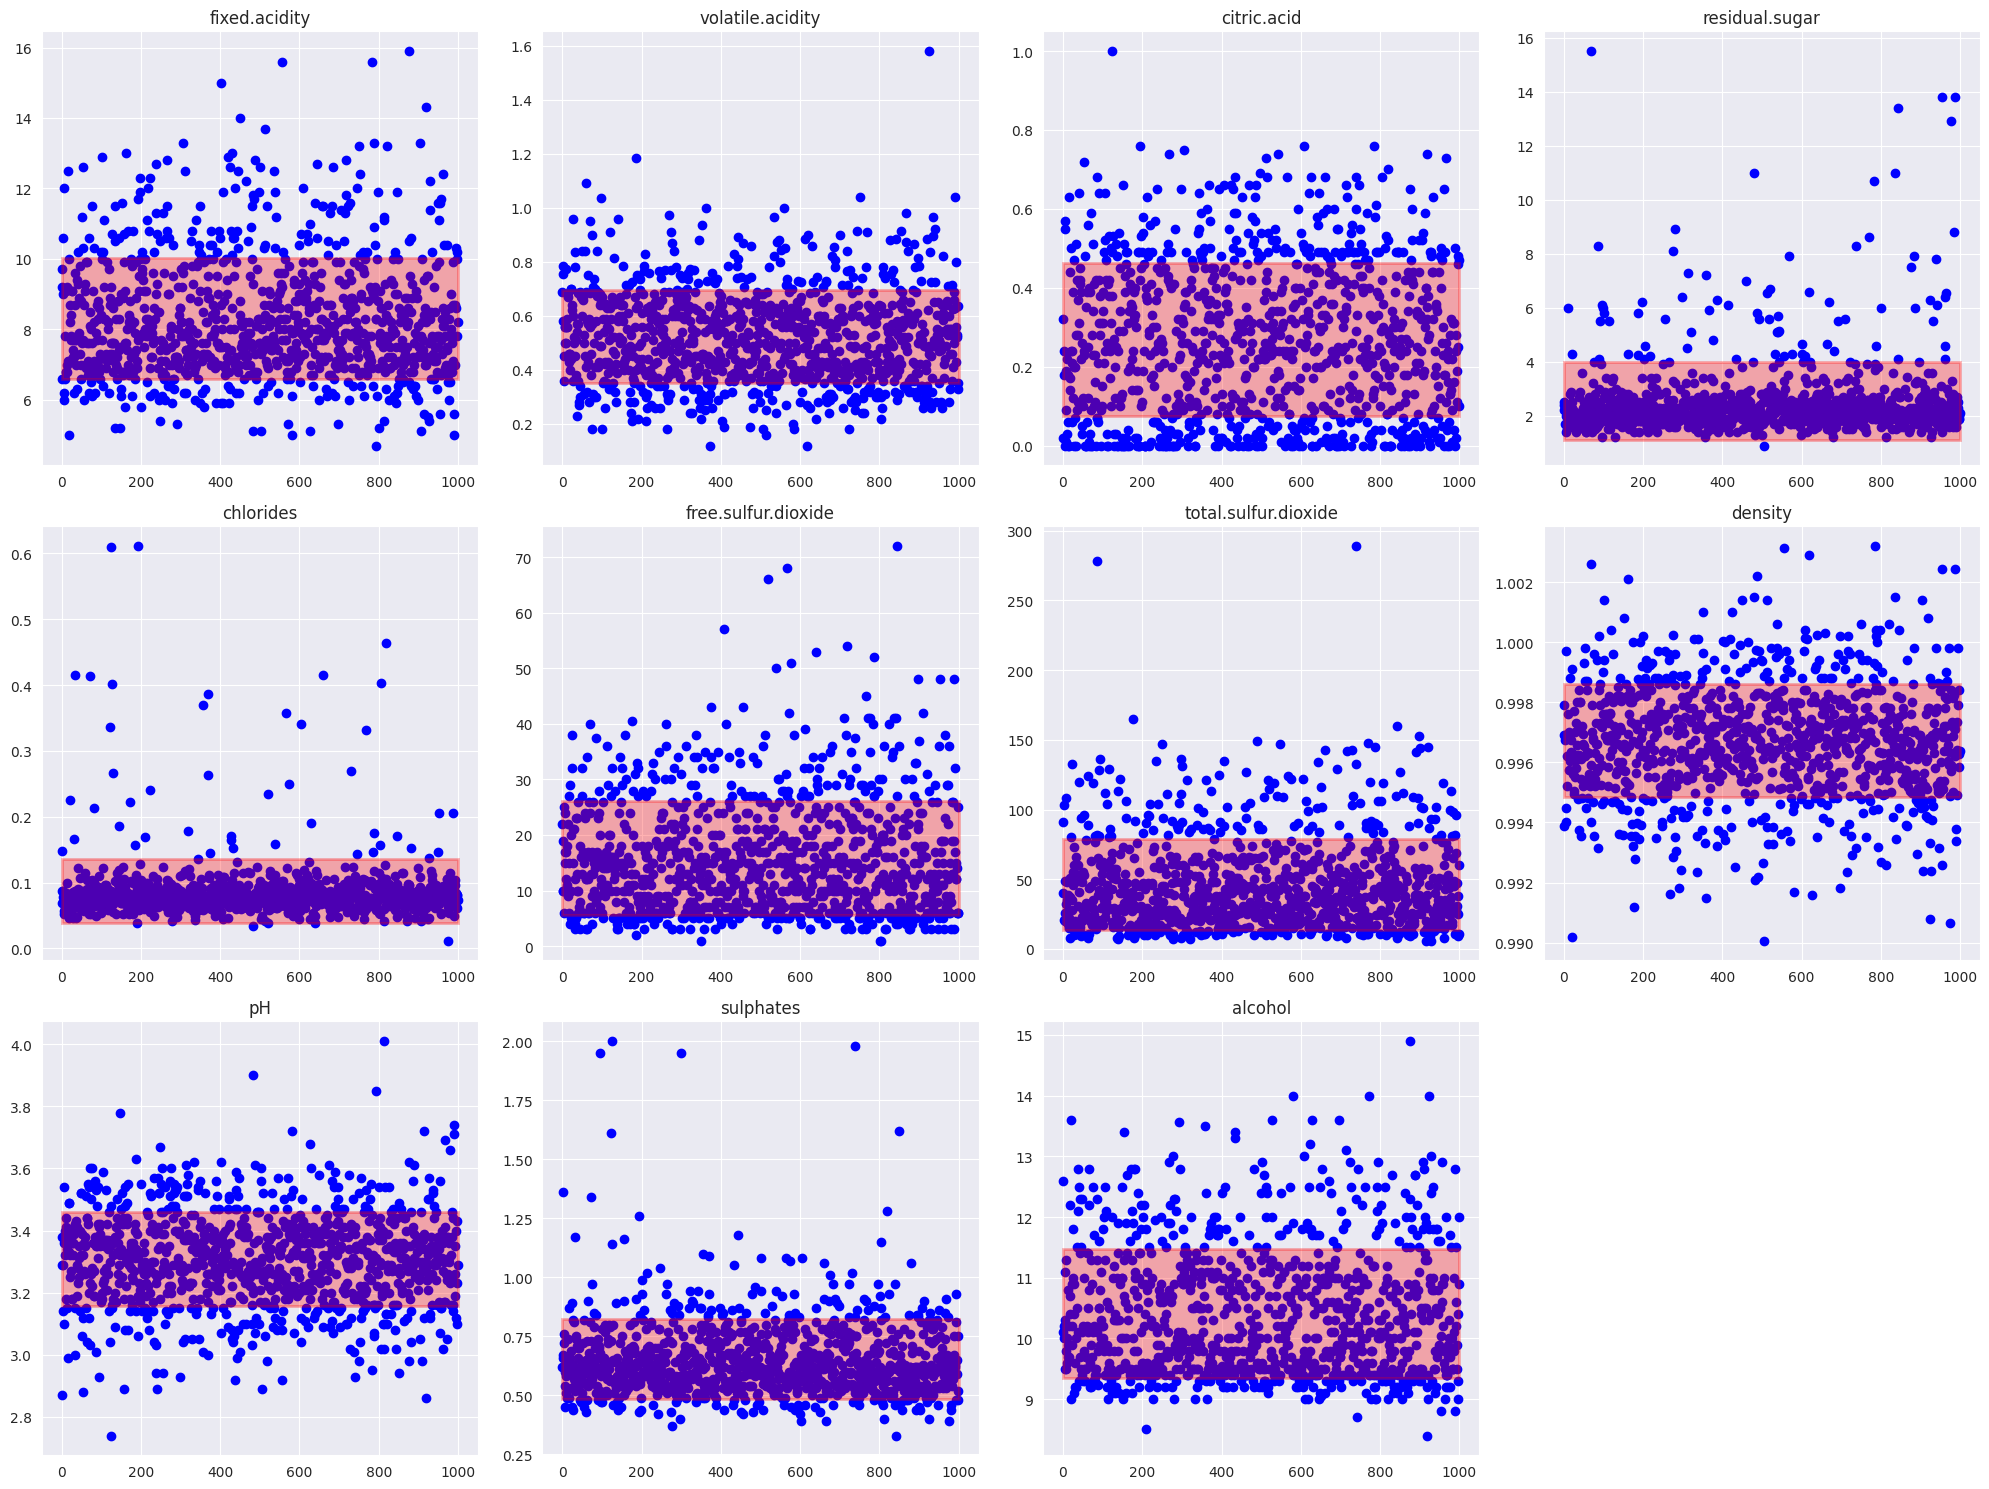

In [135]:
columns = [
    'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
    'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

plt.figure(figsize=(20, 15))

# 绘制散点图并添加红色矩形
for i, column in enumerate(columns):
    plt.subplot(3, 4, i+1)
    plt.scatter(data.index, data[column], color='blue')

    mean = data[column].mean()
    std = data[column].std()
    
    # 创建一个矩形，垂直方向覆盖均值±标准差，水平方向覆盖全部数据
    rect = patches.Rectangle((0, mean - std), len(data), 2 * std, linewidth=2, edgecolor='red', facecolor='red', alpha=0.3)
    plt.gca().add_patch(rect)  # 将矩形添加到当前的Axes对象中

    plt.title(column)
    plt.tight_layout()

plt.show()